![](https://image.freepik.com/free-vector/policeman-attack-defence-banner_89224-2451.jpg)

## <div align='center'> Police Shooting </div>

### Description 

> ####  Features of the <a href="https://www.kaggle.com/ahsen1330/us-police-shootings" target="_blank">Kaggle</a> dataset are:
  * id: case id
  * name: Nomial data for name
  * date: Timestamp of the shooting case
  * manner_of_death: Victim was either shot or shot and tasered
  * armed: Type of armed weapon the victime used
  * age: Age of the victim
  * gender: Gender of victim M (male) or F (female)
  * race: Race of the victim with 6 categories: Asian, Black, White, Native, Hispanic, and Other
  * city: City where the victim was shot
  * state: State where the victim was shot
  * signs_of_mental_illness: True or False if the victim has mental illness
  * threat_level: Either the victim attacked, undetermined, or Other
  * flee: The victim flet by Foot, Car, Not fleeing, or Other
  * body_camera: Either the police had body camera on or not (True or False)
  * arms_category: Category of arm that victim had
  

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [435]:

shooting = pd.read_csv('shootings.csv')

In [436]:
shooting.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [437]:
shooting.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [438]:
shooting = shooting.drop('id', axis = 1)

In [439]:
shooting.groupby(['race']).size()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
dtype: int64

In [440]:
shooting.groupby('flee').size()

flee
Car             820
Foot            642
Not fleeing    3073
Other           360
dtype: int64

<Figure size 1080x1080 with 0 Axes>

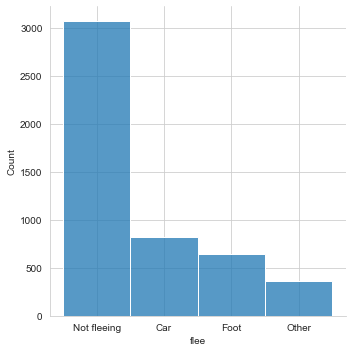

In [441]:
plt.figure(figsize=(15,15))
sns.displot(shooting['flee'])

In [442]:
state_shooting = shooting.groupby(shooting['state']).size().sort_values(ascending = False)
state_shooting

state
CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
AL     95
PA     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
MN     60
NJ     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
HI     29
MT     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
dtype: int64

In [443]:
shooting['shooting count'] =  shooting['name'].groupby(shooting['state']).transform('count')
state_shooting= shooting['shooting count'].groupby(shooting['state']).value_counts().sort_values(ascending = False)


## Exploratory Data Analysis (EDA)

In [444]:
data = dict(type='choropleth',
            locations = shooting['state'],
            locationmode = 'USA-states',
            colorscale = 'Reds',
            
            z = shooting['shooting count'],
            colorbar = {'title':"Cases Count"}
            )

In [445]:
layout = dict(title = 'Shooting Cases Per State in USA',
              geo = dict(scope='usa')
             )

In [446]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### What do we see from our map?
* California has the highest number of shootings incidents and Rhode Island has the least with only 4 cases
* The 3 most populated states (California, Texas and Florida) have the most incidents.

Text(0.5, 1.0, 'Shooting Case per Age Group')

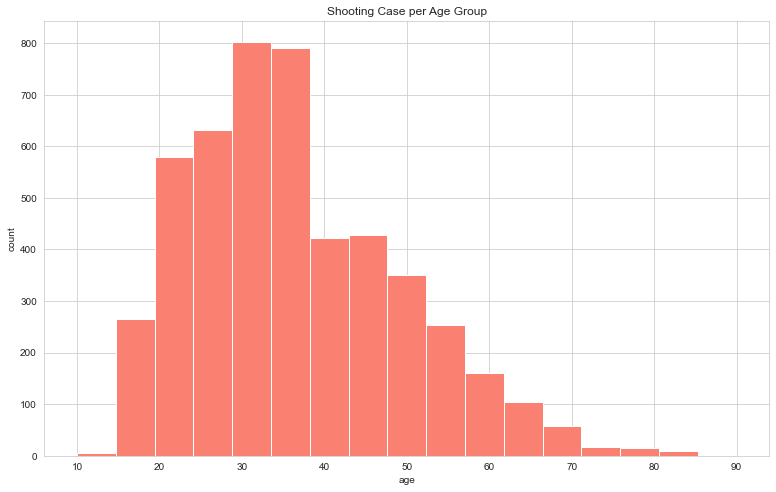

In [447]:
plt.figure(figsize = (13,8))
sns.set_style('whitegrid')
shooting['age'].hist(bins=17, range=[10, 90], color = 'salmon')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Shooting Case per Age Group')

#### What does histogram tell us?
* The majority of shooting vistims are from 20 to 40 years old
* There are a few cases for senior victims and below 20

Text(0.5, 1.0, 'Shooting Case per Gender')

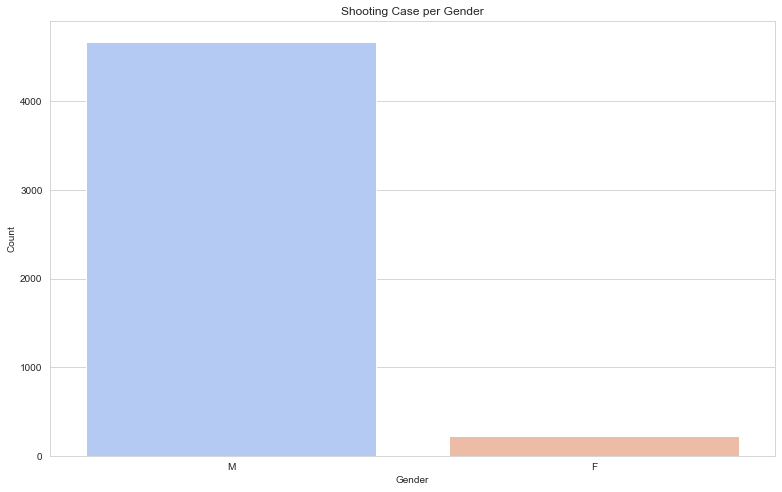

In [448]:
plt.figure(figsize = (13,8))

sns.countplot(x='gender',data= shooting,palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Shooting Case per Gender')

Majority of our victims are male.

C:\Users\vochi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cases')

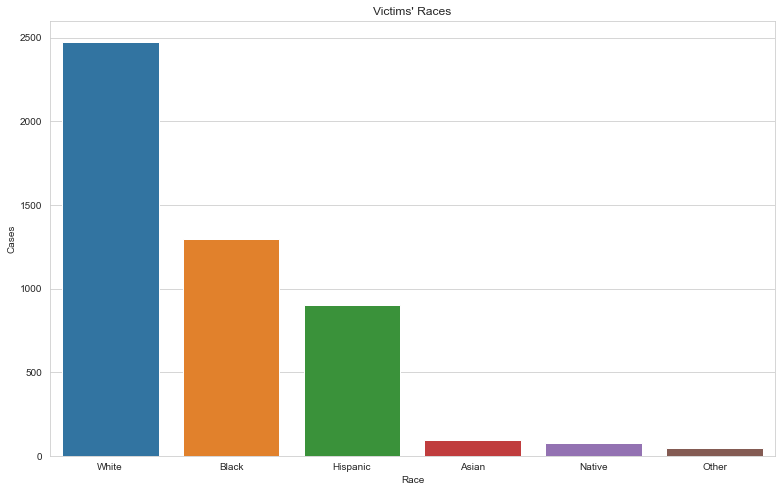

In [449]:
plt.figure(figsize = (13,8))
sns.countplot(shooting['race'], order=shooting['race'].value_counts().index)
plt.title("Victims' Races")
plt.xlabel("Race")
plt.ylabel('Cases')

Most victims are Caucasian in our dataset.

In [450]:
shooting.groupby('race').size()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
dtype: int64

##### When distributed by gender, we can see Females are much less likely to be shot and killed by police then males.

In [451]:
words = ['armed']
word2 = pd.read_csv('shootings.csv',usecols=words)
wordcloud = WordCloud(background_color="white",max_font_size=100).generate(' '.join(word2['armed']))

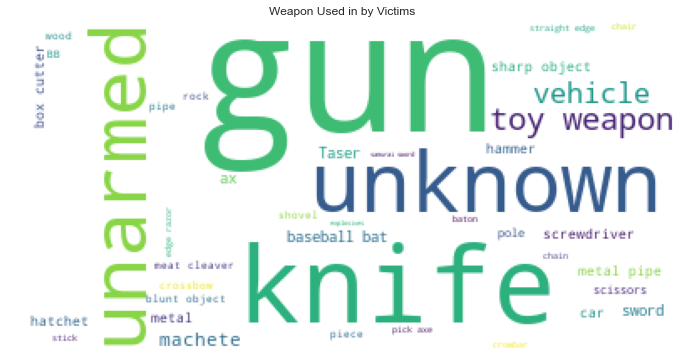

In [452]:
plt.figure(figsize=(12,12))
plt.title('Weapon Used in by Victims')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [453]:
print('Top 10 Weapons Used:')
shooting['arms_category'].value_counts().sort_values(ascending=False).head(10)

Top 10 Weapons Used:


Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Name: arms_category, dtype: int64

#### The majority of weapon that victims used in our dataset were guns, knives, toy weapons, and vehicles. Surprisingly, there were also a large number of unarmed and unknown weapons reported in our dataset.

C:\Users\vochi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cases')

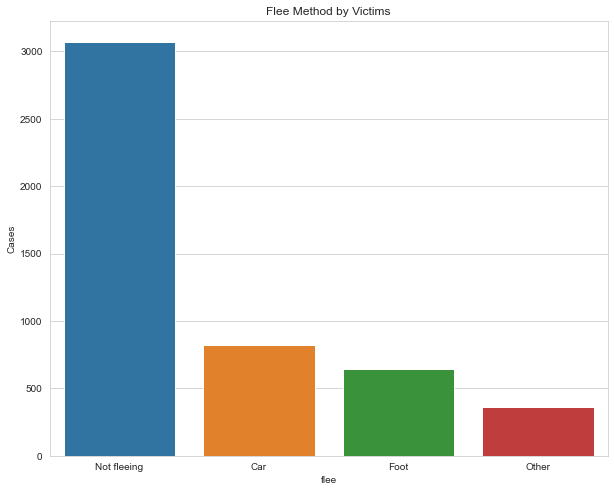

In [454]:
plt.figure(figsize=(10,8))
sns.countplot(shooting['flee'], order = shooting['flee'].value_counts().index)
plt.title('Flee Method by Victims')
plt.ylabel('Cases')

In most cases, victims didnt flee away while some other flee by car or by foot.

In [455]:
shooting.groupby('flee').size()

flee
Car             820
Foot            642
Not fleeing    3073
Other           360
dtype: int64

### Feature Engineering

In [456]:
shooting

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,shooting count
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,126
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,76
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,49
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,701
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,161
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,91
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,124
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,124


In [457]:
shooting['armed'].value_counts().sort_values(ascending=False).head(20)

gun                2755
knife               708
unknown             418
unarmed             348
toy weapon          171
vehicle             120
machete              39
Taser                24
sword                22
ax                   21
baseball bat         16
gun and knife        15
hammer               14
metal pipe           12
screwdriver          12
box cutter           11
sharp object         11
hatchet              11
gun and vehicle      10
gun and car           9
Name: armed, dtype: int64

In [458]:
top_10_labels = [y for y in shooting.armed.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels


['gun',
 'knife',
 'unknown',
 'unarmed',
 'toy weapon',
 'vehicle',
 'machete',
 'Taser',
 'sword',
 'ax']

In [459]:
def one_hot_encoding_top_x(shooting, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        shooting[variable+'_'+label] = np.where(shooting[variable]==label, 1, 0)

In [460]:
# read the data again
shooting = pd.read_csv('shootings.csv')

# encode Xarmed into the 10 most frequent categories
one_hot_encoding_top_x(shooting, 'armed', top_10_labels)
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,armed_gun,armed_knife,armed_unknown,armed_unarmed,armed_toy weapon,armed_vehicle,armed_machete,armed_Taser,armed_sword,armed_ax
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,1,0,0,0,0,0,0,0,0,0
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,1,0,0,0,0,0,0,0,0,0
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,0,0,0,1,0,0,0,0,0,0
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,...,0,0,0,0,1,0,0,0,0,0
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,...,0,0,0,0,0,0,0,0,0,0


In [461]:
top_10_labels = [y for y in shooting.arms_category.value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Guns',
 'Sharp objects',
 'Unknown',
 'Unarmed',
 'Other unusual objects',
 'Blunt instruments',
 'Vehicles',
 'Multiple',
 'Piercing objects',
 'Electrical devices']

In [462]:
# read the data again
shooting = pd.read_csv('shootings.csv')

# encode arms_category into the 10 most frequent categories
one_hot_encoding_top_x(shooting, 'arms_category', top_10_labels)
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,arms_category_Guns,arms_category_Sharp objects,arms_category_Unknown,arms_category_Unarmed,arms_category_Other unusual objects,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,1,0,0,0,0,0,0,0,0,0
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,1,0,0,0,0,0,0,0,0,0
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,0,0,0,1,0,0,0,0,0,0
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,...,0,0,0,0,1,0,0,0,0,0
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,...,0,0,0,0,0,0,0,0,1,0


In [463]:
shooting = shooting.drop('id', axis = 1)
shooting

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,arms_category_Guns,arms_category_Sharp objects,arms_category_Unknown,arms_category_Unarmed,arms_category_Other unusual objects,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,...,1,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,...,1,0,0,0,0,0,0,0,0,0
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,...,0,0,0,1,0,0,0,0,0,0
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,...,0,0,0,0,1,0,0,0,0,0
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,...,0,0,0,0,0,0,0,0,0,1
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,...,1,0,0,0,0,0,0,0,0,0
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,...,0,0,0,1,0,0,0,0,0,0
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,...,1,0,0,0,0,0,0,0,0,0


In [464]:
shooting['gender'] = shooting['gender'].map({'M':0,'F':1})

In [465]:
shooting

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,arms_category_Guns,arms_category_Sharp objects,arms_category_Unknown,arms_category_Unarmed,arms_category_Other unusual objects,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices
0,Tim Elliot,2015-01-02,shot,gun,53.0,0,Asian,Shelton,WA,True,...,1,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,0,White,Aloha,OR,False,...,1,0,0,0,0,0,0,0,0,0
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,0,Hispanic,Wichita,KS,False,...,0,0,0,1,0,0,0,0,0,0
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,0,White,San Francisco,CA,True,...,0,0,0,0,1,0,0,0,0,0
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,0,Hispanic,Evans,CO,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,0,Black,Atlanta,GA,False,...,0,0,0,0,0,0,0,0,0,1
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,0,Black,Crown Point,IN,False,...,1,0,0,0,0,0,0,0,0,0
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,1,White,Sedalia,MO,False,...,0,0,0,1,0,0,0,0,0,0
4893,William Slyter,2020-06-13,shot,gun,22.0,0,White,Kansas City,MO,False,...,1,0,0,0,0,0,0,0,0,0


In [466]:
race_dummies = pd.get_dummies(shooting['race'], drop_first=True)
shooting = pd.concat([shooting,race_dummies],axis=1)

In [467]:
shooting = shooting.drop('race', axis = 1)

In [468]:
shooting

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices,Black,Hispanic,Native,Other,White
0,Tim Elliot,2015-01-02,shot,gun,53.0,0,Shelton,WA,True,attack,...,0,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,0,Aloha,OR,False,attack,...,0,0,0,0,0,0,0,0,0,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,0,Wichita,KS,False,other,...,0,0,0,0,0,0,1,0,0,0
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,0,San Francisco,CA,True,attack,...,0,0,0,0,0,0,0,0,0,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,0,Evans,CO,False,attack,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,0,Atlanta,GA,False,attack,...,0,0,0,0,1,1,0,0,0,0
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,0,Crown Point,IN,False,attack,...,0,0,0,0,0,1,0,0,0,0
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,1,Sedalia,MO,False,other,...,0,0,0,0,0,0,0,0,0,1
4893,William Slyter,2020-06-13,shot,gun,22.0,0,Kansas City,MO,False,other,...,0,0,0,0,0,0,0,0,0,1


In [469]:
# 0 as shot and 1 as shot and Tasered
shooting['manner_of_death'] = shooting['manner_of_death'].map({'shot':0, 'shot and Tasered':1})

In [470]:
shooting

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices,Black,Hispanic,Native,Other,White
0,Tim Elliot,2015-01-02,0,gun,53.0,0,Shelton,WA,True,attack,...,0,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,Aloha,OR,False,attack,...,0,0,0,0,0,0,0,0,0,1
2,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,Wichita,KS,False,other,...,0,0,0,0,0,0,1,0,0,0
3,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,San Francisco,CA,True,attack,...,0,0,0,0,0,0,0,0,0,1
4,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,Evans,CO,False,attack,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,0,Taser,27.0,0,Atlanta,GA,False,attack,...,0,0,0,0,1,1,0,0,0,0
4891,Caine Van Pelt,2020-06-12,0,gun,23.0,0,Crown Point,IN,False,attack,...,0,0,0,0,0,1,0,0,0,0
4892,Hannah Fizer,2020-06-13,0,unarmed,25.0,1,Sedalia,MO,False,other,...,0,0,0,0,0,0,0,0,0,1
4893,William Slyter,2020-06-13,0,gun,22.0,0,Kansas City,MO,False,other,...,0,0,0,0,0,0,0,0,0,1


In [471]:
shooting

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices,Black,Hispanic,Native,Other,White
0,Tim Elliot,2015-01-02,0,gun,53.0,0,Shelton,WA,True,attack,...,0,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,Aloha,OR,False,attack,...,0,0,0,0,0,0,0,0,0,1
2,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,Wichita,KS,False,other,...,0,0,0,0,0,0,1,0,0,0
3,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,San Francisco,CA,True,attack,...,0,0,0,0,0,0,0,0,0,1
4,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,Evans,CO,False,attack,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,0,Taser,27.0,0,Atlanta,GA,False,attack,...,0,0,0,0,1,1,0,0,0,0
4891,Caine Van Pelt,2020-06-12,0,gun,23.0,0,Crown Point,IN,False,attack,...,0,0,0,0,0,1,0,0,0,0
4892,Hannah Fizer,2020-06-13,0,unarmed,25.0,1,Sedalia,MO,False,other,...,0,0,0,0,0,0,0,0,0,1
4893,William Slyter,2020-06-13,0,gun,22.0,0,Kansas City,MO,False,other,...,0,0,0,0,0,0,0,0,0,1


In [472]:
shooting['signs_of_mental_illness'] = shooting['signs_of_mental_illness'].map({False:0, True:1}).astype(int)

In [473]:
shooting['threat_level'] = shooting['threat_level'].map({'attack':1, 'other':0, 'undetermined':2})

In [474]:
shooting

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,arms_category_Blunt instruments,arms_category_Vehicles,arms_category_Multiple,arms_category_Piercing objects,arms_category_Electrical devices,Black,Hispanic,Native,Other,White
0,Tim Elliot,2015-01-02,0,gun,53.0,0,Shelton,WA,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,Aloha,OR,0,1,...,0,0,0,0,0,0,0,0,0,1
2,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,Wichita,KS,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,San Francisco,CA,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,Evans,CO,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,0,Taser,27.0,0,Atlanta,GA,0,1,...,0,0,0,0,1,1,0,0,0,0
4891,Caine Van Pelt,2020-06-12,0,gun,23.0,0,Crown Point,IN,0,1,...,0,0,0,0,0,1,0,0,0,0
4892,Hannah Fizer,2020-06-13,0,unarmed,25.0,1,Sedalia,MO,0,0,...,0,0,0,0,0,0,0,0,0,1
4893,William Slyter,2020-06-13,0,gun,22.0,0,Kansas City,MO,0,0,...,0,0,0,0,0,0,0,0,0,1


In [475]:
flee_dummies = pd.get_dummies(shooting['flee'], drop_first=True)
shooting = pd.concat([shooting,flee_dummies],axis=1)

In [476]:
shooting = shooting.drop('flee', axis =1)

In [477]:
shooting.iloc[:,0:18]

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,body_camera,arms_category,arms_category_Guns,arms_category_Sharp objects,arms_category_Unknown,arms_category_Unarmed,arms_category_Other unusual objects,arms_category_Blunt instruments
0,Tim Elliot,2015-01-02,0,gun,53.0,0,Shelton,WA,1,1,False,Guns,1,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,Aloha,OR,0,1,False,Guns,1,0,0,0,0,0
2,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,Wichita,KS,0,0,False,Unarmed,0,0,0,1,0,0
3,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,San Francisco,CA,1,1,False,Other unusual objects,0,0,0,0,1,0
4,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,Evans,CO,0,1,False,Piercing objects,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,0,Taser,27.0,0,Atlanta,GA,0,1,True,Electrical devices,0,0,0,0,0,0
4891,Caine Van Pelt,2020-06-12,0,gun,23.0,0,Crown Point,IN,0,1,False,Guns,1,0,0,0,0,0
4892,Hannah Fizer,2020-06-13,0,unarmed,25.0,1,Sedalia,MO,0,0,False,Unarmed,0,0,0,1,0,0
4893,William Slyter,2020-06-13,0,gun,22.0,0,Kansas City,MO,0,0,False,Guns,1,0,0,0,0,0


In [478]:
shooting['body_camera'] = shooting['body_camera'].map({True:1, False:0}).astype(int)

In [479]:
shooting['body_camera']

0       0
1       0
2       0
3       0
4       0
       ..
4890    1
4891    0
4892    0
4893    0
4894    0
Name: body_camera, Length: 4895, dtype: int32

In [480]:
arms_cat_dummies = pd.get_dummies(shooting['arms_category'], drop_first=False)
shooting = pd.concat([shooting,arms_cat_dummies],axis=1)

In [481]:
shooting = shooting.drop('arms_category', axis = 1)

In [482]:
shooting

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,Explosives,Guns,Hand tools,Multiple,Other unusual objects,Piercing objects,Sharp objects,Unarmed,Unknown,Vehicles
0,Tim Elliot,2015-01-02,0,gun,53.0,0,Shelton,WA,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Lewis Lee Lembke,2015-01-02,0,gun,47.0,0,Aloha,OR,0,1,...,0,1,0,0,0,0,0,0,0,0
2,John Paul Quintero,2015-01-03,1,unarmed,23.0,0,Wichita,KS,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Matthew Hoffman,2015-01-04,0,toy weapon,32.0,0,San Francisco,CA,1,1,...,0,0,0,0,1,0,0,0,0,0
4,Michael Rodriguez,2015-01-04,0,nail gun,39.0,0,Evans,CO,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,0,Taser,27.0,0,Atlanta,GA,0,1,...,0,0,0,0,0,0,0,0,0,0
4891,Caine Van Pelt,2020-06-12,0,gun,23.0,0,Crown Point,IN,0,1,...,0,1,0,0,0,0,0,0,0,0
4892,Hannah Fizer,2020-06-13,0,unarmed,25.0,1,Sedalia,MO,0,0,...,0,0,0,0,0,0,0,1,0,0
4893,William Slyter,2020-06-13,0,gun,22.0,0,Kansas City,MO,0,0,...,0,1,0,0,0,0,0,0,0,0


In [483]:
shooting = shooting.drop(['state', 'city','name'], axis = 1)

In [484]:
shooting

,date,manner_of_death,armed,age,gender,signs_of_mental_illness,threat_level,body_camera,arms_category_Guns,arms_category_Sharp objects,...,Explosives,Guns,Hand tools,Multiple,Other unusual objects,Piercing objects,Sharp objects,Unarmed,Unknown,Vehicles
0,2015-01-02,0,gun,53.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2015-01-02,0,gun,47.0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2015-01-03,1,unarmed,23.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015-01-04,0,toy weapon,32.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2015-01-04,0,nail gun,39.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,2020-06-12,0,Taser,27.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4891,2020-06-12,0,gun,23.0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4892,2020-06-13,0,unarmed,25.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4893,2020-06-13,0,gun,22.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [485]:
shooting['date'] = pd.to_datetime(shooting['date'])
#shooting['day'] = shooting['date'].apply(lambda date:date.day)
shooting['month'] = shooting['date'].apply(lambda date:date.month)
shooting['year'] = shooting['date'].apply(lambda date:date.year)

<ipython-input-485-9d790aabd730>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-485-9d790aabd730>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-485-9d790aabd730>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [486]:
shooting

,date,manner_of_death,armed,age,gender,signs_of_mental_illness,threat_level,body_camera,arms_category_Guns,arms_category_Sharp objects,...,Hand tools,Multiple,Other unusual objects,Piercing objects,Sharp objects,Unarmed,Unknown,Vehicles,month,year
0,2015-01-02,0,gun,53.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,2015
1,2015-01-02,0,gun,47.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,2015
2,2015-01-03,1,unarmed,23.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2015
3,2015-01-04,0,toy weapon,32.0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2015
4,2015-01-04,0,nail gun,39.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,2020-06-12,0,Taser,27.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,6,2020
4891,2020-06-12,0,gun,23.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,6,2020
4892,2020-06-13,0,unarmed,25.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,6,2020
4893,2020-06-13,0,gun,22.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,2020


shooting = shooting.drop('date',axis =1)

In [487]:
date_count = shooting.groupby('month').size().to_frame(name = 'cases').reset_index()

Text(0.5, 1.0, 'Cases Over Years')

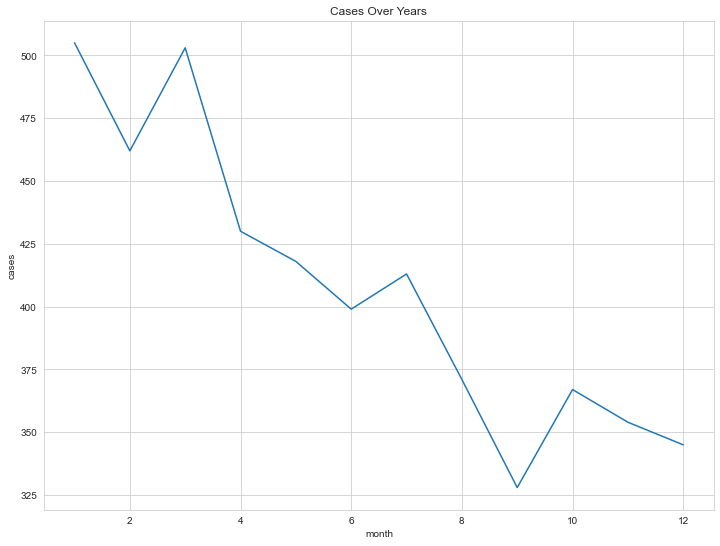

In [488]:
plt.figure(figsize=(12,9))
sns.lineplot(x="month", y="cases",
             palette="viridis",
             data=date_count)
plt.title('Cases Over Years')


In [489]:
shooting = shooting.drop('armed',axis = 1)

In [490]:
shooting.columns

Index(['date', 'manner_of_death', 'age', 'gender', 'signs_of_mental_illness',
       'threat_level', 'body_camera', 'arms_category_Guns',
       'arms_category_Sharp objects', 'arms_category_Unknown',
       'arms_category_Unarmed', 'arms_category_Other unusual objects',
       'arms_category_Blunt instruments', 'arms_category_Vehicles',
       'arms_category_Multiple', 'arms_category_Piercing objects',
       'arms_category_Electrical devices', 'Black', 'Hispanic', 'Native',
       'Other', 'White', 'Foot', 'Not fleeing', 'Other', 'Blunt instruments',
       'Electrical devices', 'Explosives', 'Guns', 'Hand tools', 'Multiple',
       'Other unusual objects', 'Piercing objects', 'Sharp objects', 'Unarmed',
       'Unknown', 'Vehicles', 'month', 'year'],
      dtype='object')

In [491]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 4895 non-null   datetime64[ns]
 1   manner_of_death                      4895 non-null   int64         
 2   age                                  4895 non-null   float64       
 3   gender                               4895 non-null   int64         
 4   signs_of_mental_illness              4895 non-null   int32         
 5   threat_level                         4895 non-null   int64         
 6   body_camera                          4895 non-null   int32         
 7   arms_category_Guns                   4895 non-null   int32         
 8   arms_category_Sharp objects          4895 non-null   int32         
 9   arms_category_Unknown                4895 non-null   int32         
 10  arms_categor

In [495]:
shooting=shooting.drop('date', axis=1)

In [496]:
X = shooting.drop('manner_of_death', axis =1)
y = shooting['manner_of_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [497]:
logreg = LogisticRegression(random_state = 0, solver = 'liblinear',multi_class='auto') 
logreg_parameters = {'penalty':('l1', 'l2'), 'C':[0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(logreg, logreg_parameters,cv=10)
logreg_grid.fit(X_train, y_train)

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ('l1', 'l2')})

In [498]:
logreg_grid.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [499]:
logreg_test = LogisticRegression(random_state = 0, solver = 'liblinear',multi_class='auto',C=0.01,penalty='l1')
logreg_test.fit(X_train, y_train)
print('Train score: {:.4f}'.format(logreg_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(logreg_test.score(X_test, y_test)))

Train score: 0.9521
Test score: 0.9428


In [500]:
from sklearn.neighbors import KNeighborsClassifier

In [501]:
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors':np.arange(1,20,1)}
knn_grid = GridSearchCV(knn, knn_parameters,cv=10)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [502]:
knn_grid.best_params_

{'n_neighbors': 8}

In [503]:
knn_test = KNeighborsClassifier(n_neighbors=2, leaf_size= 30, metric='minkowski', p=2, weights= 'uniform')
knn_test.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn_test.score(X_test, y_test)))

Train score: 0.9542
Test score: 0.9408


In [504]:
knn_prediction = knn_test.predict(X_test)

print('Confusion Matrix \n', confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))
print('Precision score: ', precision_score( y_test, knn_prediction, average = 'macro'))
print('Recall Score: ', recall_score( y_test, knn_prediction, average = 'macro'))

Confusion Matrix 
 [[1382    3]
 [  84    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1385
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1469
   macro avg       0.47      0.50      0.48      1469
weighted avg       0.89      0.94      0.91      1469

Precision score:  0.4713506139154161
Recall Score:  0.49891696750902526


In [505]:
from sklearn.svm import LinearSVC

In [506]:
linr = LinearSVC(random_state = 0, dual=False)
linr_parameters = {'penalty':('l1', 'l2'), 'C':[0.001,0.01,0.1,1,10,100] }
linr_grid = GridSearchCV(linr, linr_parameters,cv=10,iid=True)
linr_grid.fit(X_train, y_train)

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\svm\_base.py:

GridSearchCV(cv=10, estimator=LinearSVC(dual=False, random_state=0), iid=True,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ('l1', 'l2')})

In [507]:
linr_grid.best_params_

{'C': 0.001, 'penalty': 'l1'}

In [508]:
linr_test = LinearSVC(random_state = 0,dual=False,C= 0.001, penalty= 'l1')
linr_test.fit(X_train, y_train)
print('Train score: {:.4f}'.format(linr_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linr_test.score(X_test, y_test)))

Train score: 0.9521
Test score: 0.9428


In [509]:
lnsvc_prediction = linr_test.predict(X_test)

print('Confusion Matrix \n', confusion_matrix(y_test, lnsvc_prediction))
print(classification_report(y_test, lnsvc_prediction))
print('Precision score: ', precision_score( y_test, lnsvc_prediction, average = 'macro'))
print('Recall Score: ', recall_score( y_test, lnsvc_prediction, average = 'macro'))

Confusion Matrix 
 [[1385    0]
 [  84    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1385
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1469
   macro avg       0.47      0.50      0.49      1469
weighted avg       0.89      0.94      0.92      1469

Precision score:  0.4714091218515997
Recall Score:  0.5


C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [510]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',random_state=0)
#svm_parameters = {'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1]}
#svm_grid = GridSearchCV(svm, svm_parameters,cv=3, n_jobs=4)
#svm_grid.fit(X_train, y_train)

In [511]:
svm_grid_para = {'C': 0.001,'gamma':0.001}
svm_grid_para
#C 0.001; Gamma 0.001

{'C': 0.001, 'gamma': 0.001}

In [512]:
from sklearn.svm import SVC
svm_test = SVC(kernel='linear',random_state=0,C= 0.001, gamma= 0.001)
svm_test.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svm_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svm_test.score(X_test, y_test)))

Train score: 0.9521
Test score: 0.9428


In [513]:
svm_prediction = svm_test.predict(X_test)

print('Confusion Matrix \n', confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))
print('Precision score: ', precision_score( y_test, svm_prediction, average = 'macro'))
print('Recall Score: ', recall_score( y_test, svm_prediction, average = 'macro'))

Confusion Matrix 
 [[1385    0]
 [  84    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1385
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1469
   macro avg       0.47      0.50      0.49      1469
weighted avg       0.89      0.94      0.92      1469

Precision score:  0.4714091218515997
Recall Score:  0.5


C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [514]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree_parameters = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6, 7],
                  'max_features': [1, 2, 3, 4, 5, 6],
                  'min_samples_split':[5, 10, 15, 20, 25],
                  'min_samples_leaf':[1, 2, 3, 4, 5, 6]}
dtree_grid = GridSearchCV(dtree, dtree_parameters,cv=10)
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']})

In [515]:
dtree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

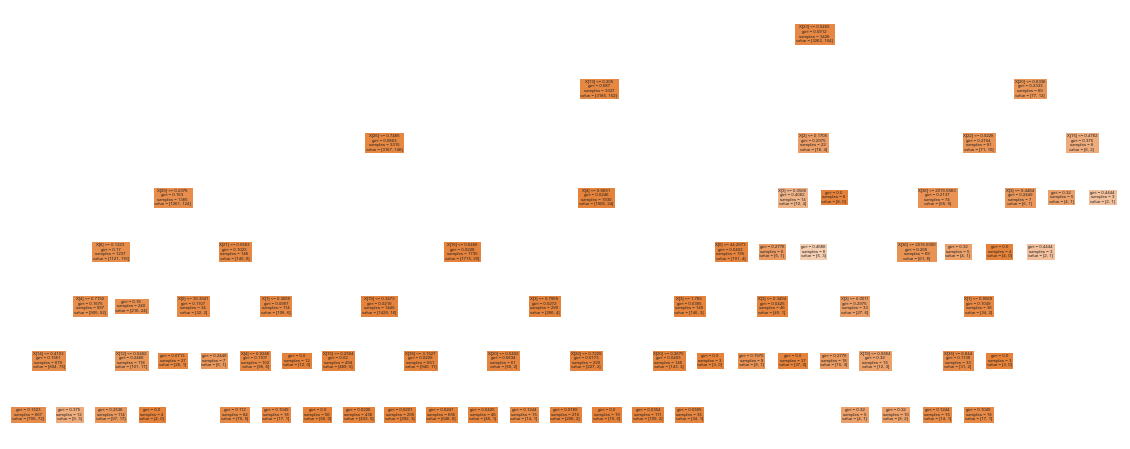

In [516]:
dtree_test = DecisionTreeClassifier(random_state=0,max_depth=7 ,criterion='gini',max_features=2,min_samples_leaf=3,min_samples_split=5,splitter='random')
dtree_test.fit(X_train, y_train)

plt.figure(figsize = (20,8))
tree.plot_tree(dtree_test,precision=4,impurity=True,filled=True)
plt.show()

In [517]:
print('Train score: {:.4f}'.format(dtree_test.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree_test.score(X_test, y_test)))

Train score: 0.9521
Test score: 0.9428


In [521]:
final_test_prediction = logreg_test.predict(X_test)

print('Confusion Matrix \n', confusion_matrix(y_test, final_test_prediction))


Confusion Matrix 
 [[1385    0]
 [  84    0]]


In [522]:
print(classification_report(y_test, final_test_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1385
           1       0.00      0.00      0.00        84

    accuracy                           0.94      1469
   macro avg       0.47      0.50      0.49      1469
weighted avg       0.89      0.94      0.92      1469



C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [523]:
print('Precision score: ', precision_score(y_test, final_test_prediction, average = 'macro'))

print('Recall Score: ', recall_score( y_test, final_test_prediction, average = 'macro'))

Precision score:  0.4714091218515997
Recall Score:  0.5


C:\Users\vochi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### 
* In reviewing the police shootings, we chose to look at the manner of death and whether or not the police officer used a taser, prior to resorting to their gun. This could imply they were trained to use restraint and hopefully prevent future incidents.
* The information could prove useful in the future, when implementing policies and procedures or designing trainings. The end result would be to decrease shooting incidents, while improving justice for the suspects.
* Since the data is historical and specific, we could not discover unstructured datapoints to improve on our understanding of all the factors. It would be interesting to see the officers’ training history and perhaps prior incidents and in the future monitoring of the vitals, to see whether they were in a heightened state prior to firing their weapon. 
* We used precision and recall score to evaluate our classification report, since the dataset is biased with the majority of deaths showing no use of a taser (unbalanced). The model could be used for police report generation for similar cases and futher implemenation in police reform.  
